<a href="https://colab.research.google.com/github/souptiks/Fruit_Or_Vegetable_Identifier/blob/main/Traning_Fruit_Vegitables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#Data Preprocessing

##Tranning Image Preprocesing

In [ ]:
traning_set = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Data_Set/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Data_Set/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


#Bulding Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Bulding convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides= 2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# to minimize the size and get only important feature
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides= 2))

In [ ]:
# # Dropout helps to prevent overfitting
# cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) # To Build Neurons (Hidden Layer)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))  #Dropping some neuron to avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) # Output Layer

#Compiling and Traning Phase

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
traning_history = cnn.fit(x = traning_set, validation_data=validation_set,epochs = 32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.0388 - loss: 13.5956 - val_accuracy: 0.0940 - val_loss: 3.1901
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.0932 - loss: 3.3210 - val_accuracy: 0.2336 - val_loss: 2.7042
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.1427 - loss: 3.0777 - val_accuracy: 0.4131 - val_loss: 2.2949
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.2220 - loss: 2.7478 - val_accuracy: 0.6154 - val_loss: 1.6058
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3542 - loss: 2.2393 - val_accuracy: 0.8262 - val_loss: 0.7624
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5263 - loss: 1.6336 - val_accuracy: 0.8889 - val_loss: 0.5341
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6872 - loss: 1.1097 - val_accuracy: 0.8917 - val_loss: 0.4406
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.7667 - loss: 0.7984 - val_accuracy: 0.9174 - 

#Saving Model

In [ ]:
cnn.save('traning_model.h5')

In [ ]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(traning_history.history,f)


In [ ]:
print(traning_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model on validation set

In [ ]:
print("Validation set accuracy: {} %".format(traning_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 94.87179517745972 %


#Accuracy Visualitation

##Traning Visualitation

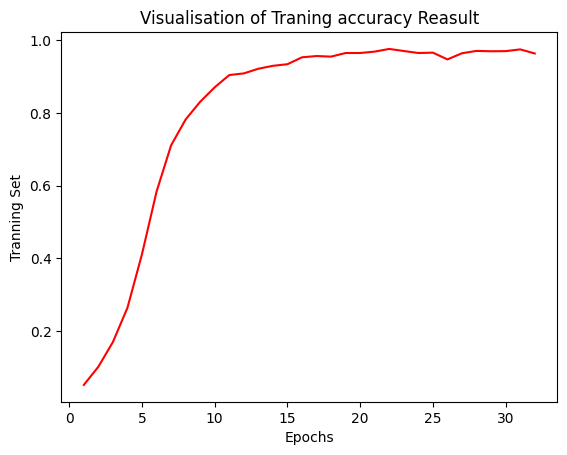

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,traning_history.history['accuracy'],color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Tranning Set')
plt.title('Visualisation of Traning accuracy Reasult')
plt.show()

##Validation Accruacy

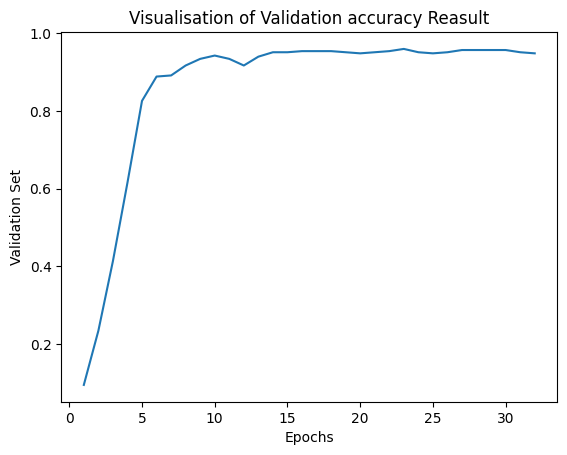

In [ ]:
plt.plot(epochs,traning_history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Validation Set")
plt.title('Visualisation of Validation accuracy Reasult')
plt.show()

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,233,358 (65.74 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,488,906 (43.83 MB)